# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df = pd.read_csv('diabetes.csv')


In [129]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [130]:
#info on column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [131]:
# data frame has 769 units of observation and 9 variables
df.shape

(768, 9)

In [132]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [133]:
# outcome variable 
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

<Axes: >

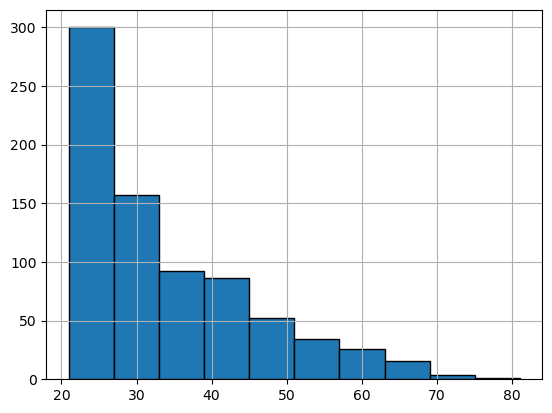

In [134]:
df["Age"].hist(edgecolor = "black")

In [135]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()) + " Avg Age " + str(df["Age"].mean()))

Max Age: 81 Min Age: 21 Avg Age 33.240885416666664


In [235]:
str(df["BMI"].mean())

'31.992578124999998'

In [237]:
str(df["Glucose"].mean())

'120.89453125'

In [136]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [137]:
# cleaning data to replace zero values with mean of column

data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/1361917890.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/1361917890.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/var/folders/q

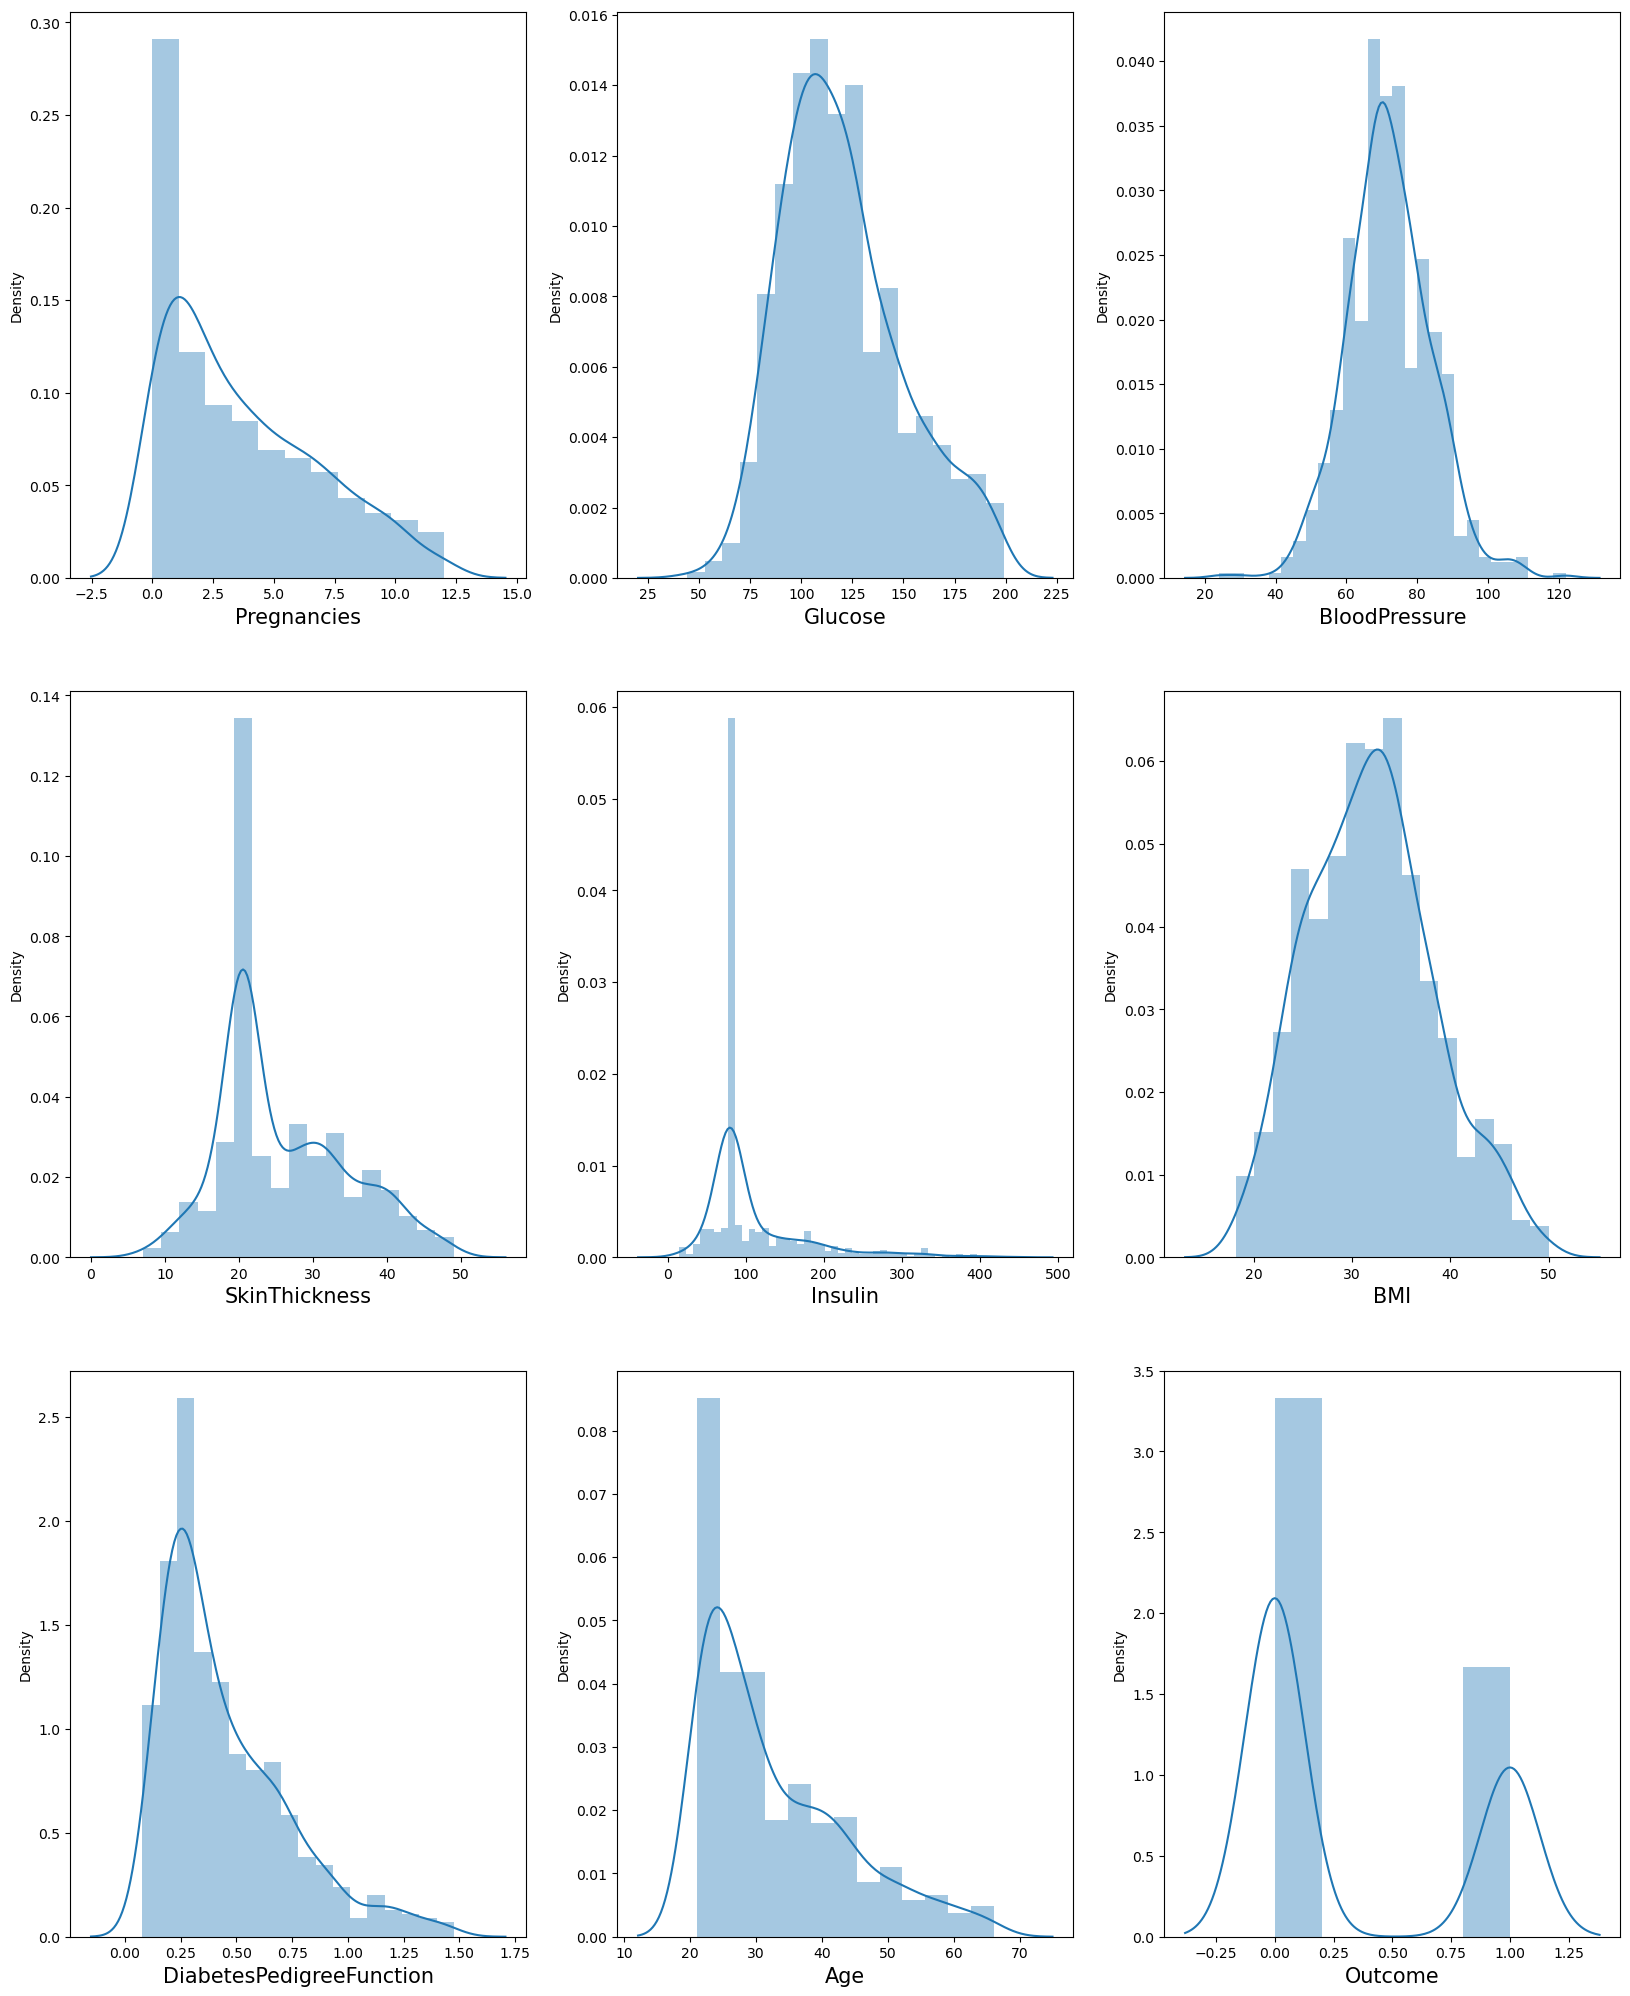

In [138]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

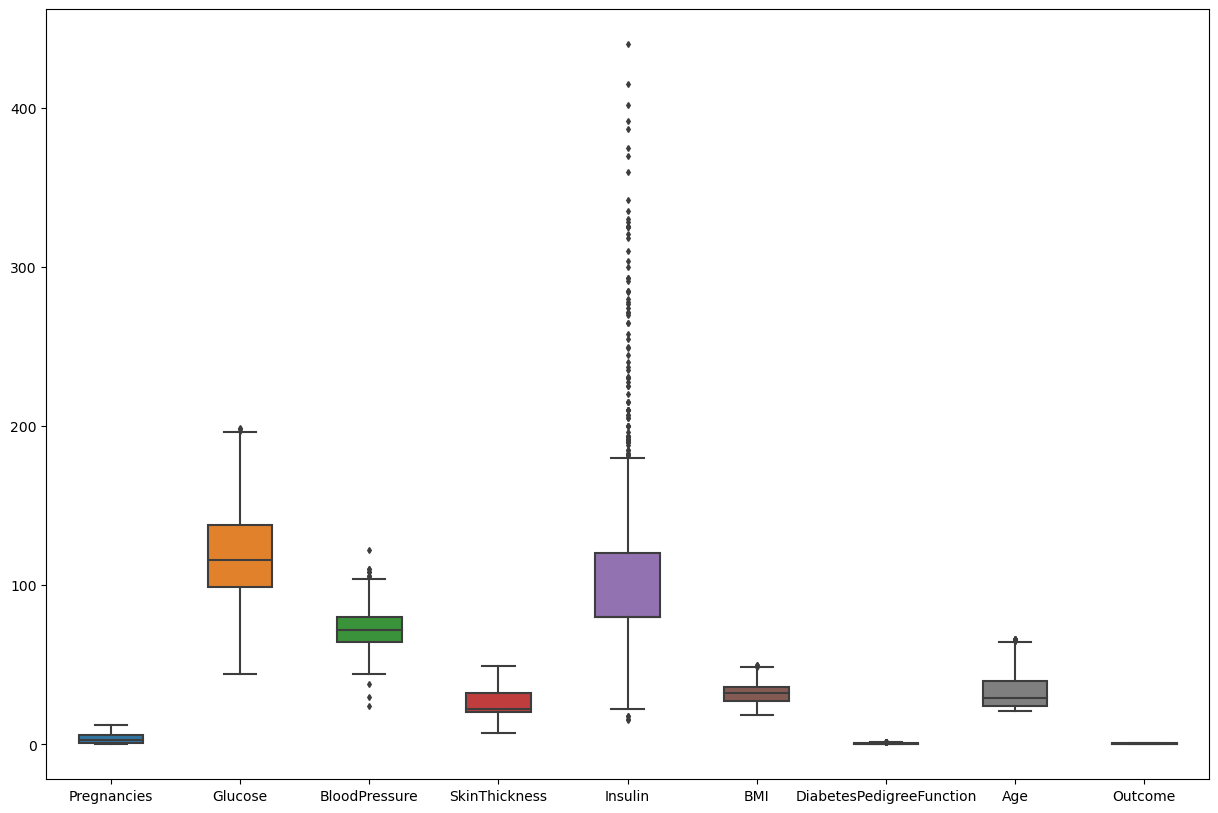

In [139]:
# boxplot to see outliers in dataset

fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)
plt.show()

<Axes: xlabel='Insulin'>

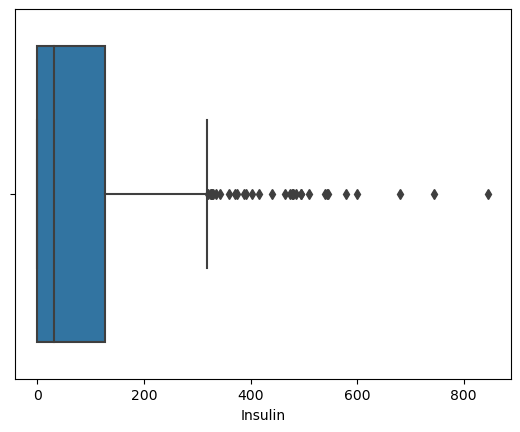

In [140]:
import seaborn as sns
sns.boxplot(x = df["Insulin"])

In [141]:
outlier = data['Pregnancies'].quantile(0.99)
# removing the top 1% data from the pregnancies column
data = data[data['Pregnancies']<outlier]

outlier = data['BMI'].quantile(0.99)
# removing the top 1% data from BMI column
data = data[data['BMI']<outlier]

outlier = data['SkinThickness'].quantile(0.99)
# removing the top 1% data from SkinThickness column
data = data[data['SkinThickness']<outlier]

outlier = data['Insulin'].quantile(0.98)
# removing the top 2% data from Insulin column
data = data[data['Insulin']<outlier]

outlier = data['DiabetesPedigreeFunction'].quantile(0.99)
# removing the top 1% data from DiabetesPedigreeFunction column
data = data[data['DiabetesPedigreeFunction']<outlier]

outlier = data['Age'].quantile(0.99)
# removing the top 1% data from Age column
data = data[data['Age']<outlier]

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/3392516839.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/3392516839.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
/var/folders/q

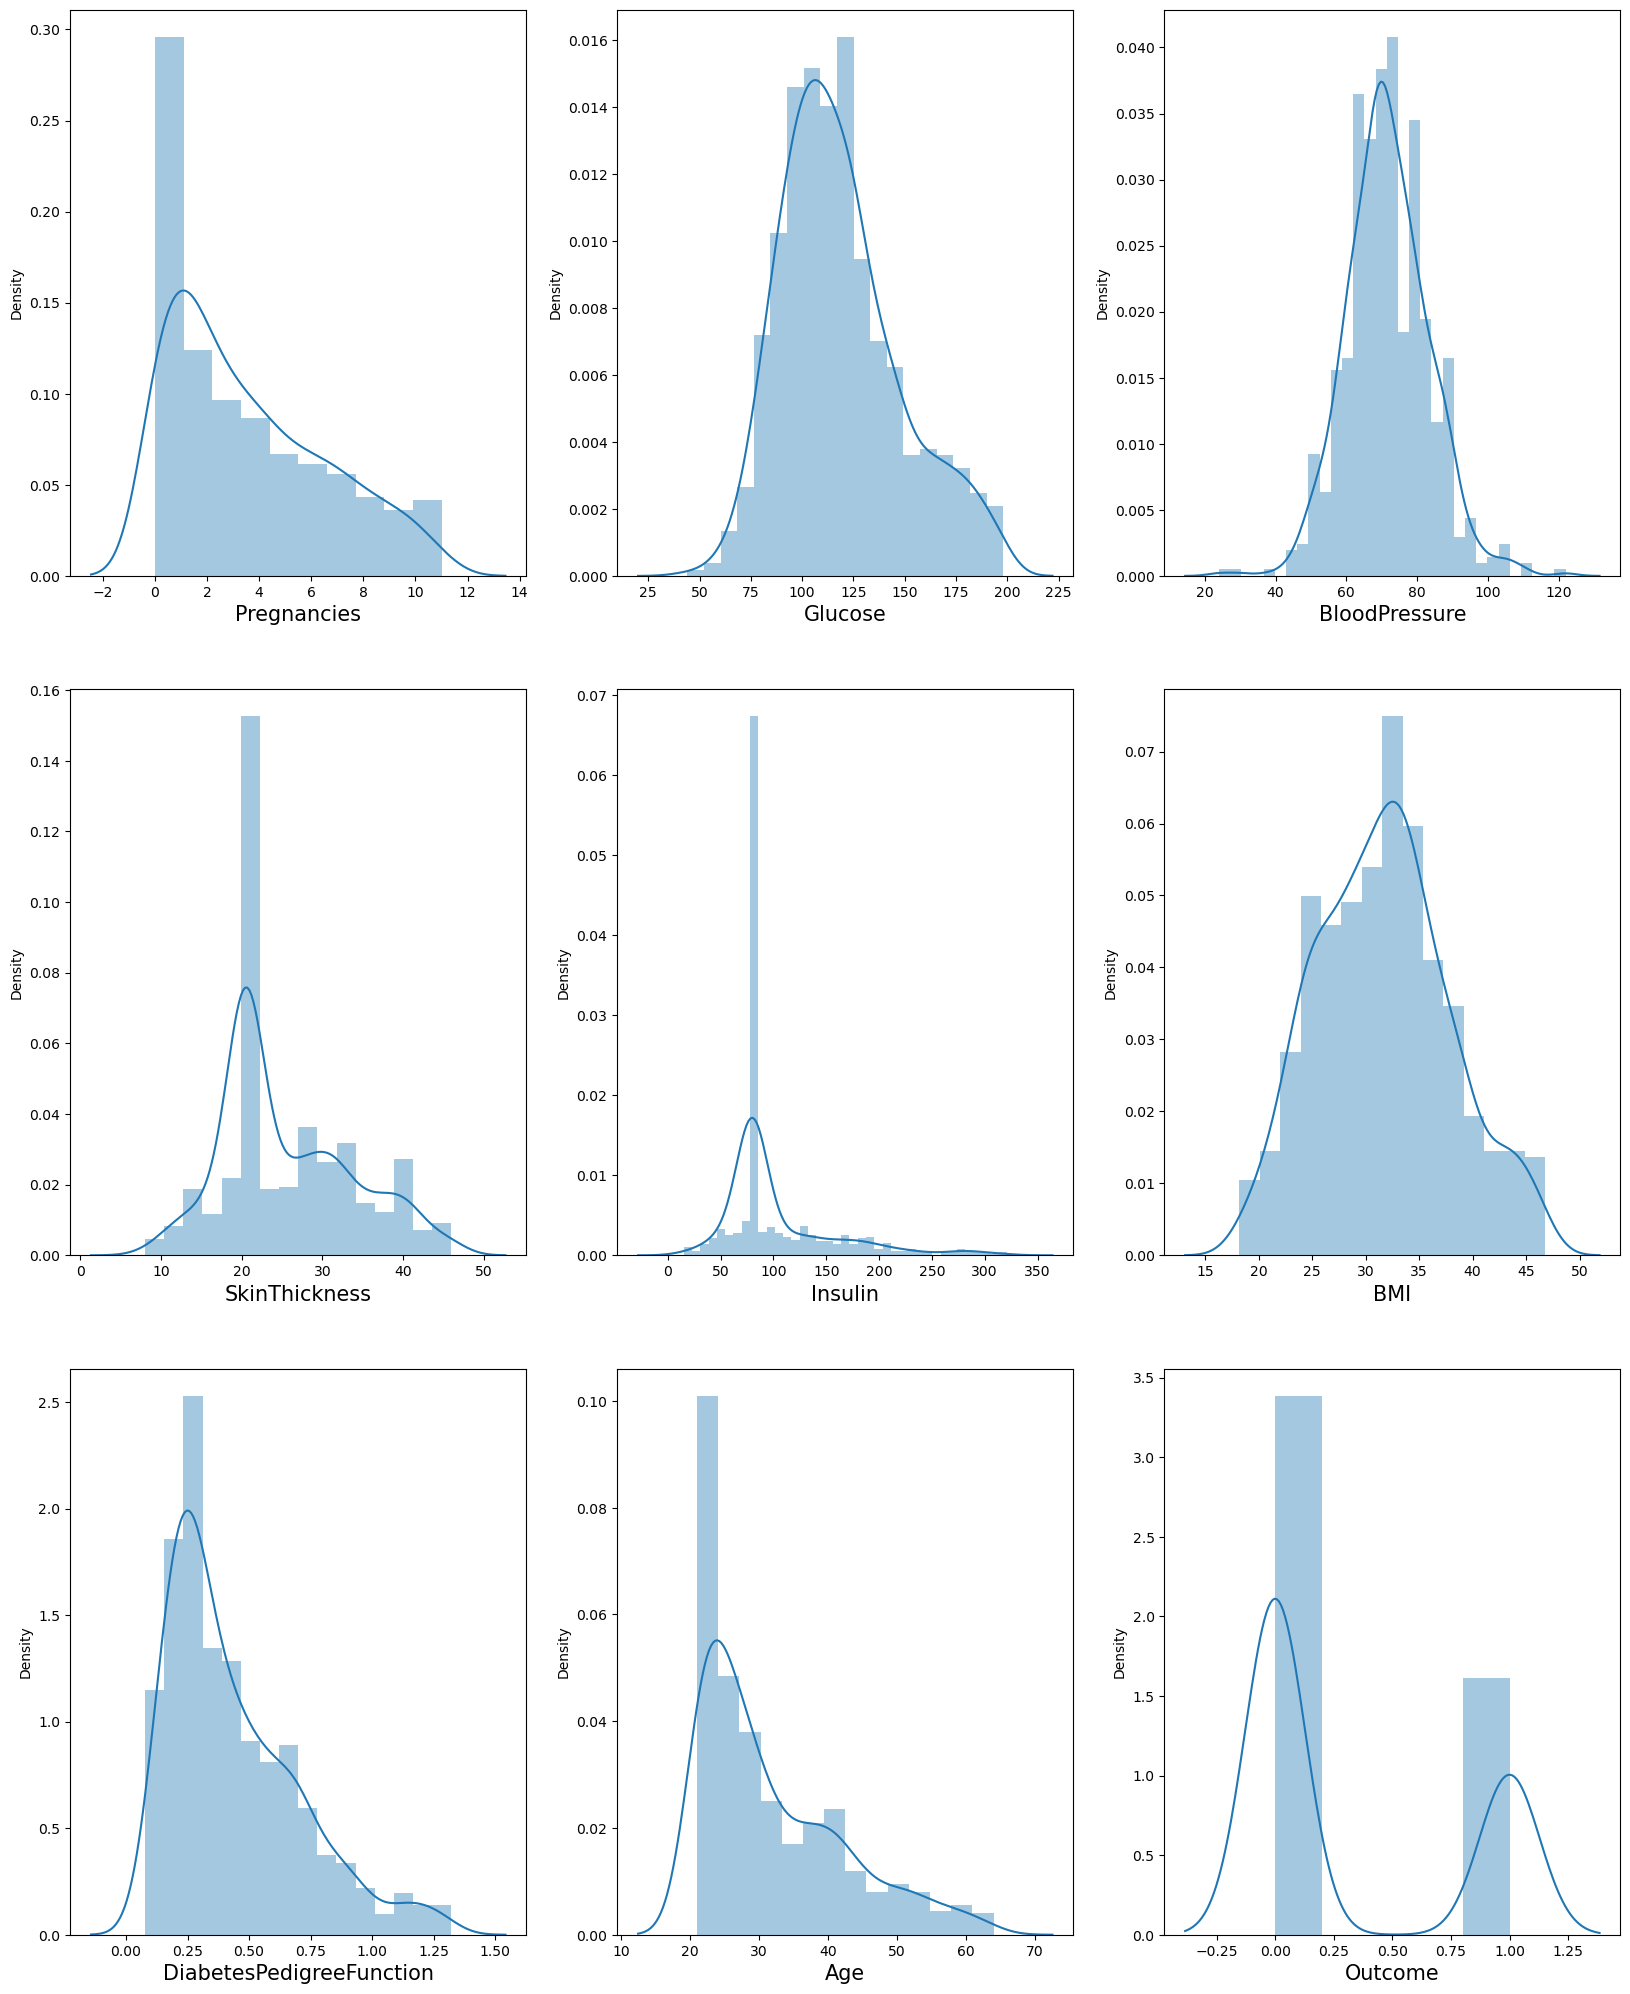

In [142]:
# Double check the data distribution

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

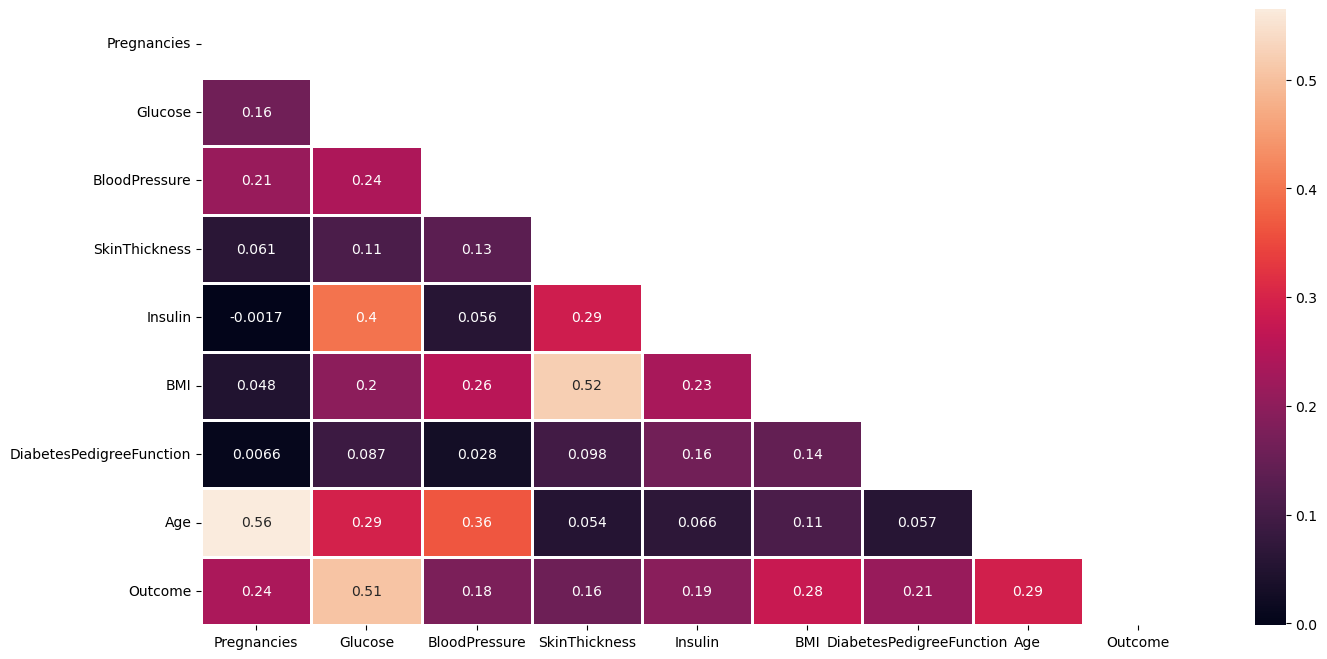

In [143]:
plt.figure(figsize = (16, 8))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', linewidths = 1)
plt.show()

In [144]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [145]:
correlation= data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.162027,0.213662,0.061448,-0.001673,0.047593,0.006634,0.564757,0.239427
Glucose,0.162027,1.000000,0.240615,0.110200,0.397946,0.199174,0.087080,0.294871,0.505497
BloodPressure,0.213662,0.240615,1.000000,0.132139,0.056166,0.255298,0.028142,0.363659,0.176163
SkinThickness,0.061448,0.110200,0.132139,1.000000,0.287204,0.521959,0.097804,0.054434,0.155743
Insulin,-0.001673,0.397946,0.056166,0.287204,1.000000,0.234656,0.163034,0.065914,0.194466
BMI,0.047593,0.199174,0.255298,0.521959,0.234656,1.000000,0.144292,0.110677,0.277597
DiabetesPedigreeFunction,0.006634,0.087080,0.028142,0.097804,0.163034,0.144292,1.000000,0.056901,0.214316
Age,0.564757,0.294871,0.363659,0.054434,0.065914,0.110677,0.056901,1.000000,0.292600
Outcome,0.239427,0.505497,0.176163,0.155743,0.194466,0.277597,0.214316,0.292600,1.000000


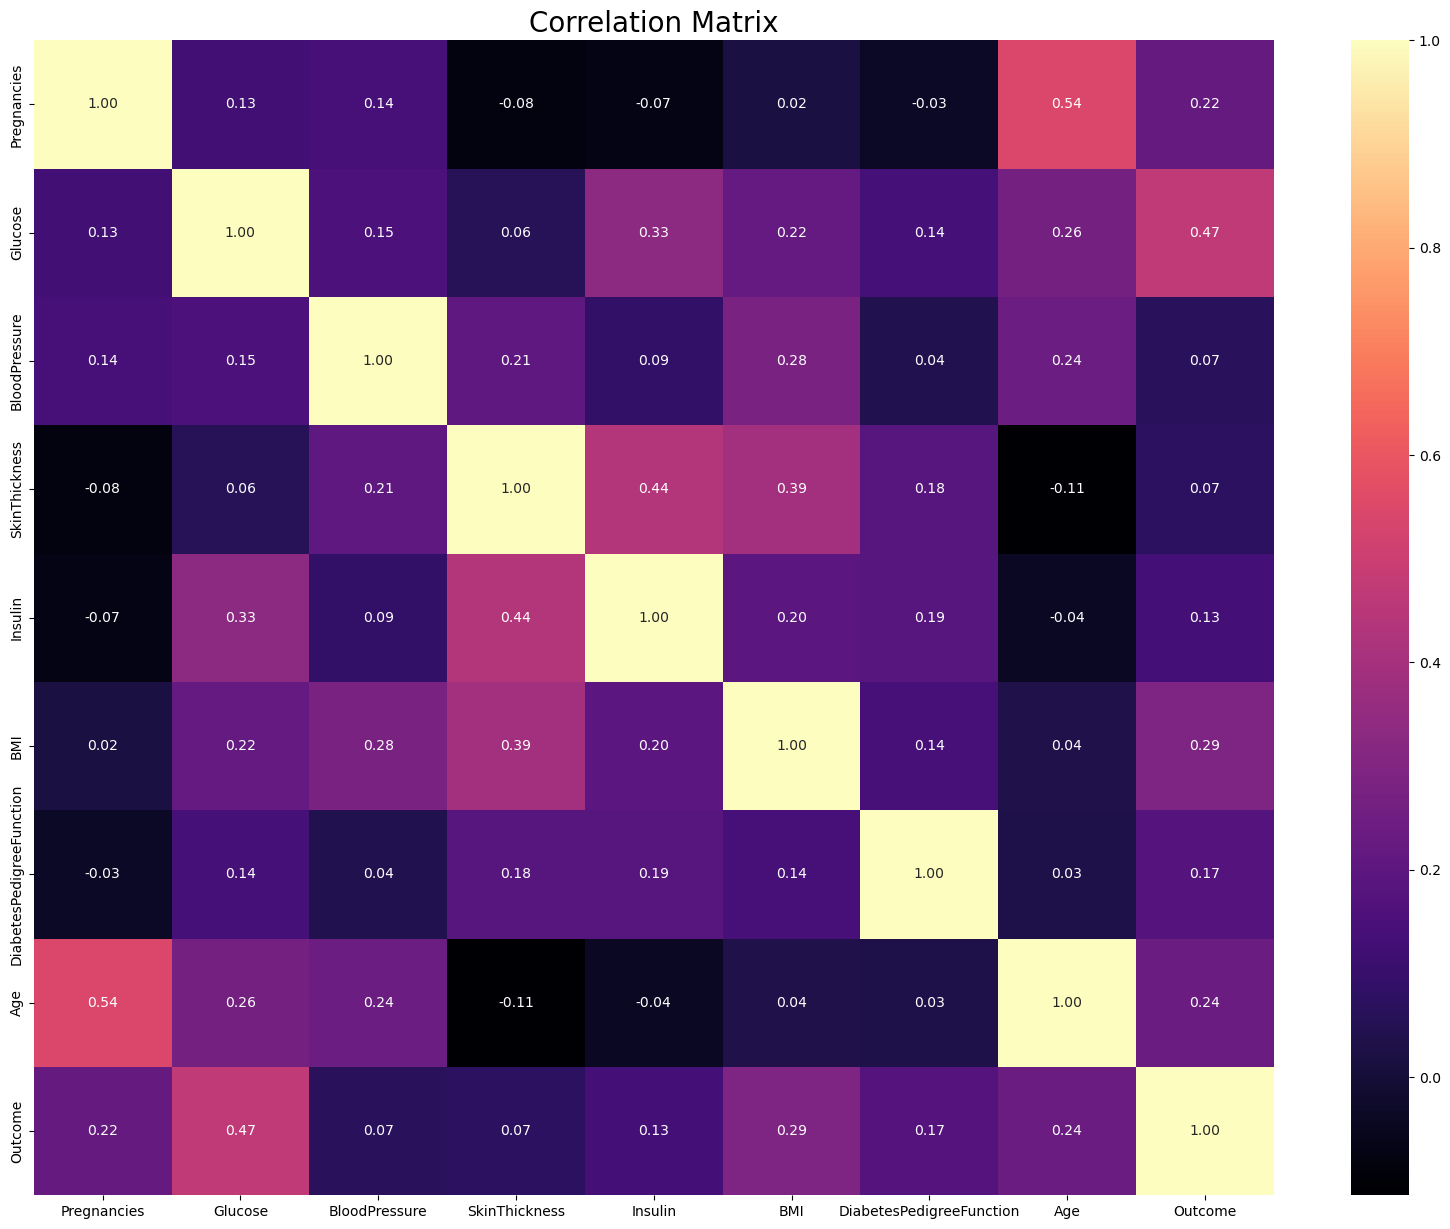

In [146]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


In [193]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [194]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [195]:
df.groupby("Outcome").agg({"Insulin": "mean"})


,Insulin
Outcome,
0,68.792000
1,100.335821


In [196]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [197]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


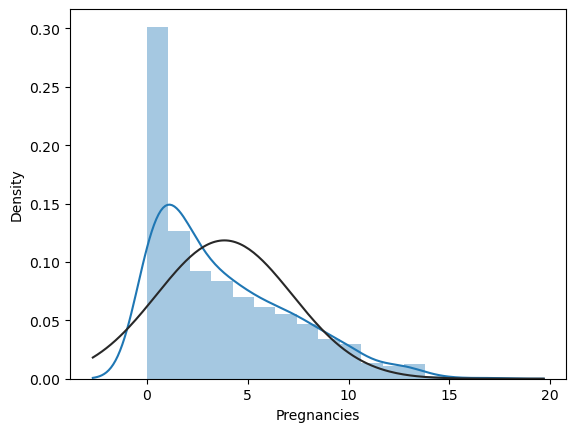

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


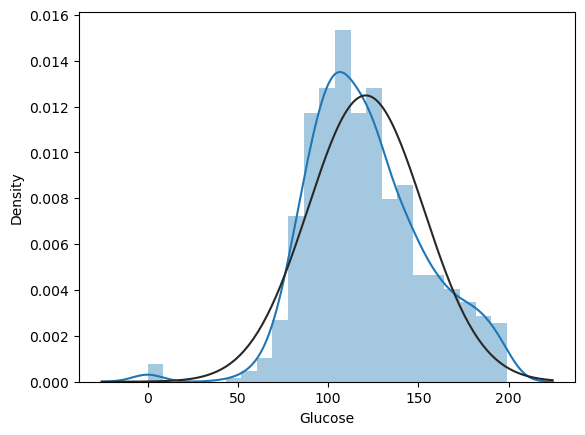

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


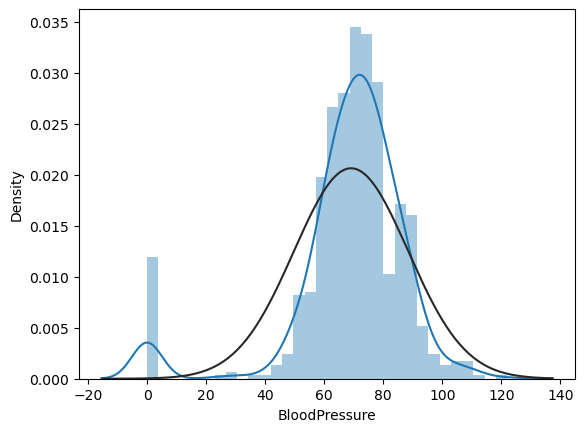

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


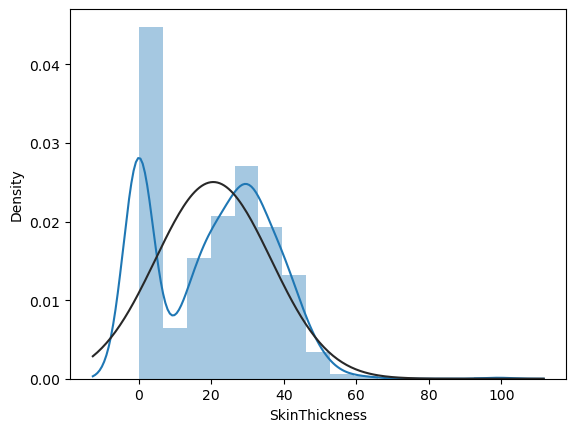

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


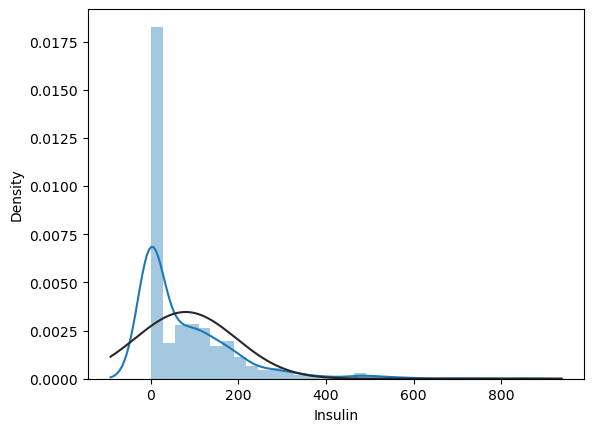

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


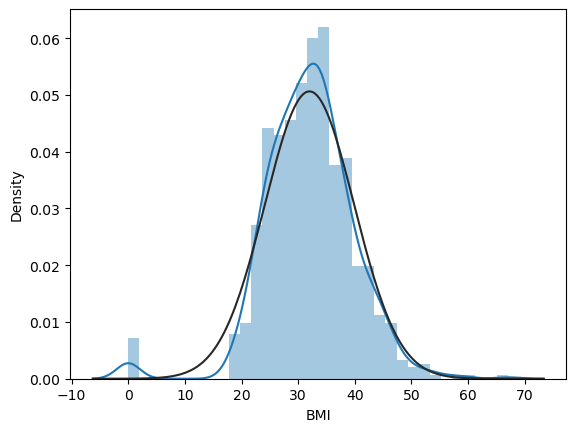

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


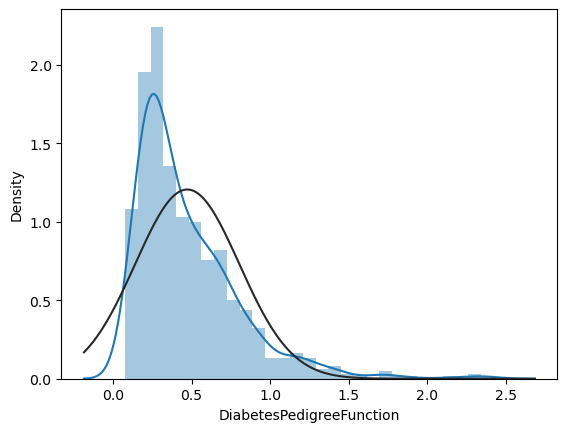

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


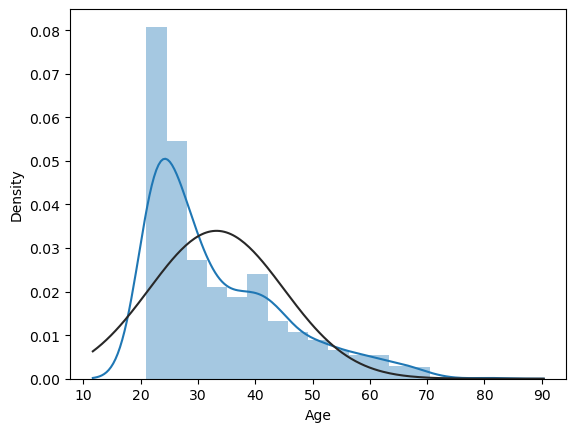

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


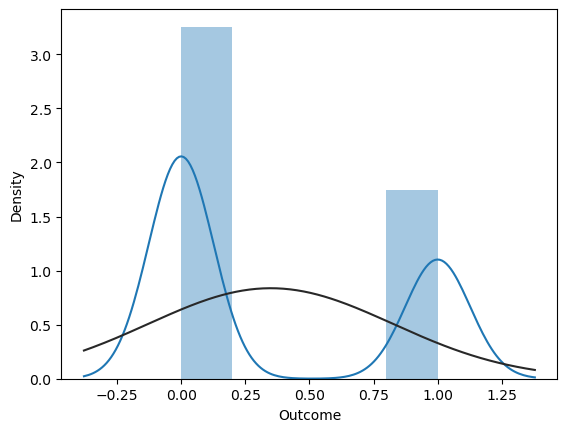

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


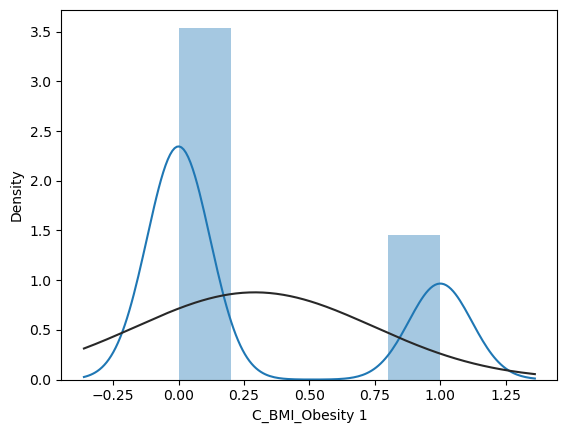

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


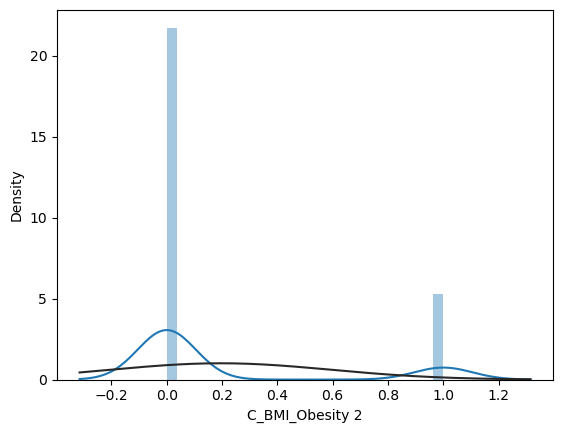

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


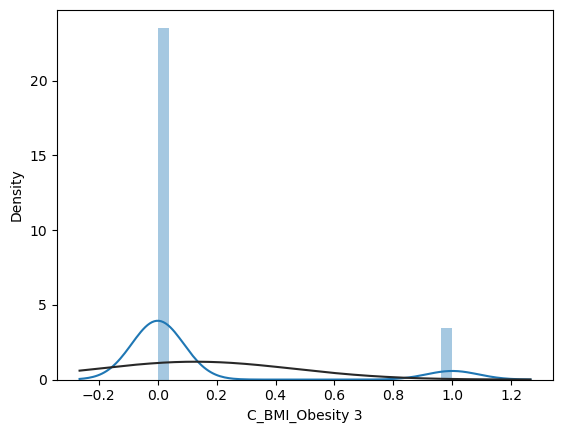

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


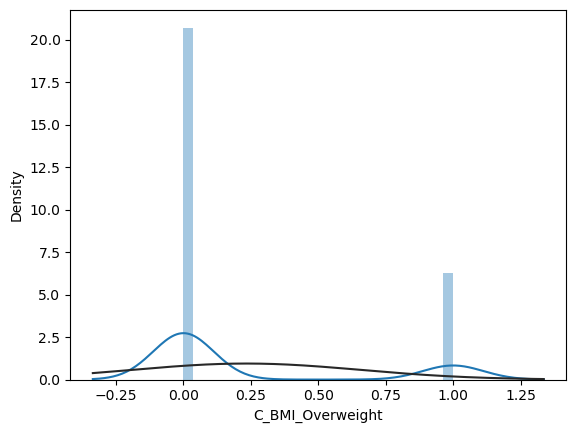

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


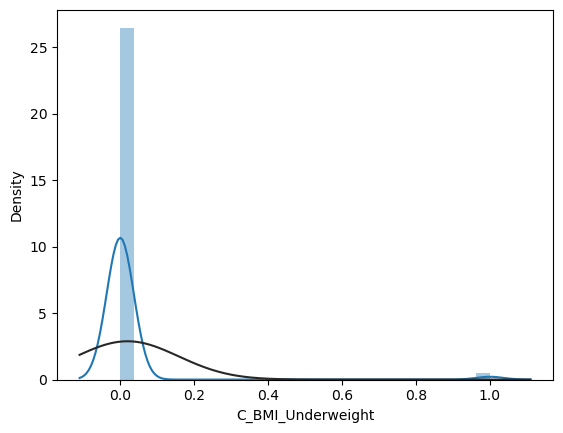

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


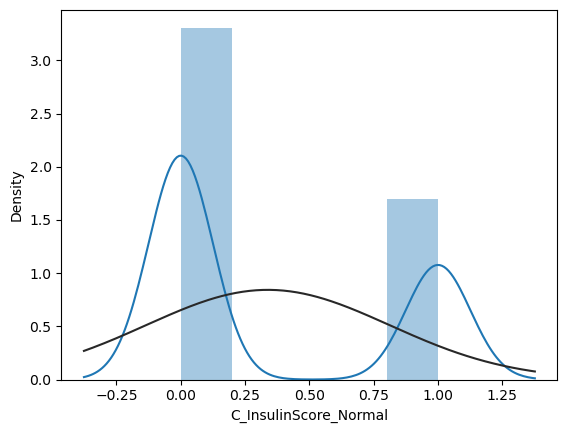

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


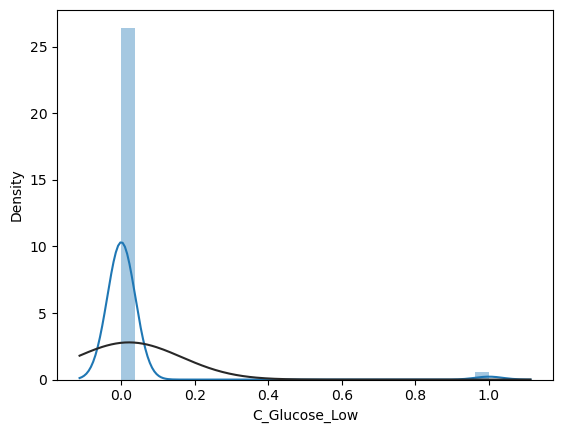

/var/folders/q1/9jx7tfvd7wj86_2q576n94wr0000gp/T/ipykernel_3640/2970646526.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)


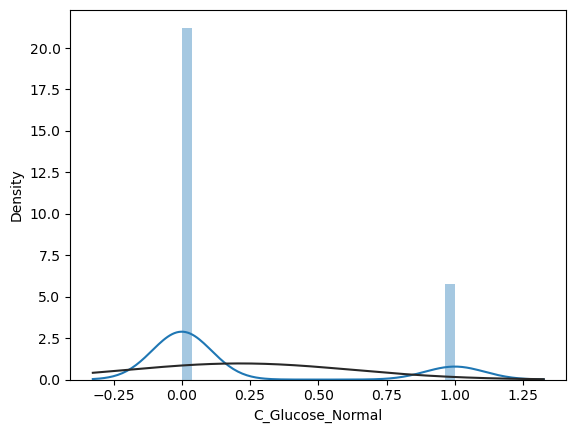

In [227]:
from scipy import stats
from scipy.stats import norm, skew

for i in df.columns:
    plt.figure()
    sns.distplot(df[i], fit = norm)
    plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [147]:
# Creating new column to convert BMI to Categorial Column
C_BMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["C_BMI"] = C_BMI
df.loc[df["BMI"] < 18.5, "C_BMI"] = C_BMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "C_BMI"] = C_BMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "C_BMI"] = C_BMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "C_BMI"] = C_BMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "C_BMI"] = C_BMI[4]
df.loc[df["BMI"] > 39.9 ,"C_BMI"] = C_BMI[5]

In [148]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,C_BMI
0,6,148,72,35,0,33.6,0.627,50,1,Obesity 1
1,1,85,66,29,0,26.6,0.351,31,0,Overweight
2,8,183,64,0,0,23.3,0.672,32,1,Normal
3,1,89,66,23,94,28.1,0.167,21,0,Overweight
4,0,137,40,35,168,43.1,2.288,33,1,Obesity 3


In [149]:
# Adding categorical variable for Insulin 
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [150]:
# The operation performed was added to the dataframe.
df = df.assign(C_InsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,C_BMI,C_InsulinScore
0,6,148,72,35,0,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Abnormal
2,8,183,64,0,0,23.3,0.672,32,1,Normal,Abnormal
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Obesity 3,Abnormal


In [151]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,C_BMI,C_InsulinScore
0,6,148,72,35,0,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Abnormal
2,8,183,64,0,0,23.3,0.672,32,1,Normal,Abnormal
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Obesity 3,Abnormal


In [152]:
# creating glucose categorical variables.
C_Glucose = pd.Series(["Low", "Normal",  "High"], dtype = "category")
df["C_Glucose"] = C_Glucose
df.loc[df["Glucose"] <= 70, "C_Glucose"] = C_Glucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 98), "C_Glucose"] = C_Glucose[1]
df.loc[df["Glucose"] > 98 ,"C_Glucose"] = C_Glucose[2]

In [153]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,C_BMI,C_InsulinScore,C_Glucose
0,6,148,72,35,0,33.6,0.627,50,1,Obesity 1,Abnormal,High
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Abnormal,Normal
2,8,183,64,0,0,23.3,0.672,32,1,Normal,Abnormal,High
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Obesity 3,Abnormal,High


In [154]:
# Converting New Categories into numerical values using the Dummy variable trap.
df = pd.get_dummies(df, columns =["C_BMI","C_InsulinScore", "C_Glucose"], drop_first = True)

In [155]:
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,C_BMI_Obesity 1,C_BMI_Obesity 2,C_BMI_Obesity 3,C_BMI_Overweight,C_BMI_Underweight,C_InsulinScore_Normal,C_Glucose_Low,C_Glucose_Normal
0,6,148,72,35,0,33.6,0.627,50,1,1,0,0,0,0,0,0,0
1,1,85,66,29,0,26.6,0.351,31,0,0,0,0,1,0,0,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0,0,0,0,0,0,0,0
3,1,89,66,23,94,28.1,0.167,21,0,0,0,0,1,0,1,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0,0,1,0,0,0,0,0


In [164]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.8524590163934426
Test Accuracy of SVC Model is 0.754601226993865


array([[92, 13],
       [27, 31]])

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       105
           1       0.70      0.53      0.61        58

    accuracy                           0.75       163
   macro avg       0.74      0.71      0.71       163
weighted avg       0.75      0.75      0.75       163



In [158]:
def test_models(models, X,y, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            x_train, x_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)
            models[i].fit(x_train,y_train).predict(x_train)
            r2_train.append(models[i].fit(x_train,y_train).score(x_train, y_train))
            models[i].fit(x_train,y_train).predict(x_test)
            r2_test.append(models[i].fit(x_train,y_train).score(x_test, y_test))
            
            results[i] = [np.mean(r2_train), np.mean(r2_test)]
           
    return pd.DataFrame(results)

In [159]:
# generate 'ground truth'
y_true = np.random.normal(0,1,10)

# generate random errors
errors = np.random.normal(0,0.02,10)

# simulate predictions
y_pred = y_true + errors


In [160]:
# import MSE from sklearn
from sklearn.metrics import mean_squared_error

# compute MSE
MSE = mean_squared_error(y_true,y_pred)  

# print MSE
print(MSE)

0.0005088271702603124


In [161]:
# RMSE by Numpy
RMSE = np.sqrt(MSE)
print(RMSE)

# RMSE by sklearn
RMSE = mean_squared_error(y_true,y_pred,squared=False)
print(RMSE)

0.02255719774839757
0.02255719774839757


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [170]:

# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# scaling the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [241]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.7948717948717948
Test Accuracy of SVC Model is 0.7948717948717948


In [231]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[51,  5],
       [12, 10]])

In [232]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        56
           1       0.67      0.45      0.54        22

    accuracy                           0.78        78
   macro avg       0.74      0.68      0.70        78
weighted avg       0.77      0.78      0.77        78



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

In [172]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[92, 13],
       [27, 31]])

In [173]:

# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       105
           1       0.70      0.53      0.61        58

    accuracy                           0.75       163
   macro avg       0.74      0.71      0.71       163
weighted avg       0.75      0.75      0.75       163



In [250]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 7}
0.7691756272401433


In [251]:

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decesion Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decesion Tree Model is {dtc_test_acc}")

Training Accuracy of Decesion Tree Model is 0.8493589743589743
Test Accuracy of Decesion Tree Model is 0.717948717948718


In [253]:
# confusion matrix

confusion_matrix(y_test, y_pred)

# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        56
           1       0.56      0.45      0.50        22

    accuracy                           0.74        78
   macro avg       0.68      0.66      0.66        78
weighted avg       0.73      0.74      0.74        78



In [177]:

# dividing dataset into training set and holdout set by 40% 

from sklearn.model_selection import train_test_split

train, val_train, test, val_test = train_test_split(X, y, test_size = 0.4, random_state = 355)

In [178]:
# Split the training set again into training and test dataset

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state = 355)


In [200]:
# using Decision Tree and SVM algorithm as base models.
# fitting both of the models first on the X_train and y_train data.

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [202]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [203]:
predict_val1 = dtc.predict(val_train)
predict_val2 = svc.predict(val_train)

In [204]:
predict_val = np.column_stack((predict_val1, predict_val2))

In [205]:
predict_test1 = dtc.predict(X_test)
predict_test2 = svc.predict(X_test)

In [206]:
predict_test = np.column_stack((predict_test1, predict_test2))

In [210]:
models = ['SVC', 'Decision Tree']
scores = [svc_test_acc, dtc_test_acc,]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree,0.785276
0,SVC,0.754601


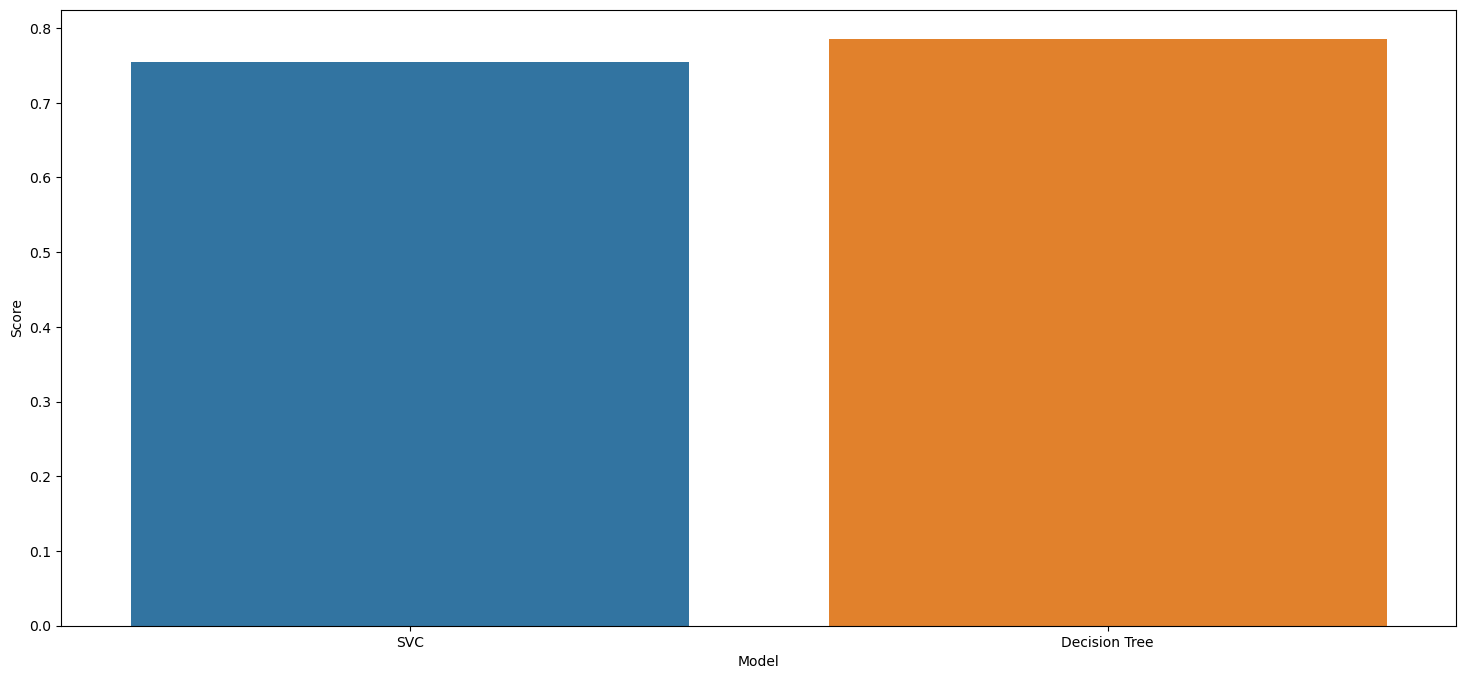

In [211]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.


CONCLUSION

-The Decision Tree model achieved a higher accuracy score of 0.785276 compared to the Support Vector Machine (SVC) model, which scored 0.754601.
-Decision Tree model outperformed the SVC model in terms of predictive accuracy, indicating that it made more accurate predictions on the given dataset.
-Both models show reasonable performance, with the Decision Tree model having a slightly better accuracy, making it a favorable choice for this specific task.